In [1]:
import math
import pandas as pd
import random
import seaborn as sns
import statistics as stats
import warnings

In [2]:
## Uncomment and run this cell to reset the state and get reproducible results
# random.seed(a="seed dated: 2020-07-23")

In [3]:
# Code for configuration of global parameters
pd.options.display.max_columns = None
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(rc={"figure.figsize": (10, 8)})

In [4]:
# The number of trials for each value of k
trials = 200

In [5]:
def min_max(a, b, c):
    """
    Returns the maximum possible and the minimum possible root from
    the given parameters. It returns None if no real roots exist.
    """
    dsquared = b * b - 4 * a * c
    
    # We only consider real roots
    if dsquared < 0:
        return None
    
    d = math.sqrt(dsquared)
    twoa = 2 * a
    minroot = (-b - d) / twoa
    maxroot = (-b + d) / twoa
    return (minroot, maxroot)

In [6]:
def get_row_of_data_for(k):
    """
    Returns a row of data by performing an experiment for the given
    value of k. The values returned are:
    1. k
    2. Mean of the maximum roots
    3. Mean of the minimum roots
    4. Std dev of the maximum roots
    5. Std dev of the minimum roots
    """
    max_roots = []
    min_roots = []

    for current_trial in range(trials):
        # We loop until we get valid roots
        roots = None
        while roots is None:
            # We chose from 1 (inclusive) to k (inclusive)
            a = random.randrange(1, k + 1)
            b = random.randrange(1, k + 1)
            c = random.randrange(1, k + 1)

            roots = min_max(a, b, c)

        # unpack the data
        minroot, maxroot = roots
        max_roots.append(maxroot)
        min_roots.append(minroot)
    
    return [
        k,
        stats.mean(max_roots), stats.mean(min_roots),
        stats.stdev(max_roots), stats.stdev(min_roots)
    ]

In [13]:
data = [get_row_of_data_for(k) for k in range(3, 30)]

In [14]:
df = pd.DataFrame(
    data, columns=[
        "k",
        "Mean of the maximum roots",
        "Mean of the minimum roots",
        "Std dev of the maximum roots",
        "Std dev of the minimum roots"
    ]
)
df

,k,Mean of the maximum roots,Mean of the minimum roots,Std dev of the maximum roots,Std dev of the minimum roots
0,3,-0.684450,-1.673050,0.281112,0.708919
1,4,-0.814081,-1.867586,0.515641,0.989253
2,5,-0.640356,-2.120894,0.412021,1.320510
3,6,-0.647402,-2.474598,0.476587,1.518225
4,7,-0.656045,-2.678598,0.464371,1.781775
5,8,-0.599691,-2.868243,0.460289,2.073270
6,9,-0.668506,-3.068670,0.535786,2.355332
7,10,-0.563333,-3.149808,0.431400,2.433672
8,11,-0.584772,-3.324665,0.474357,2.741132
9,12,-0.573747,-3.728643,0.470730,3.119888


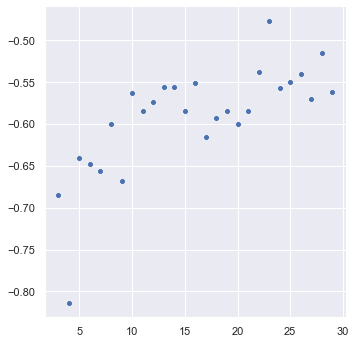

In [15]:
try:
    sns.relplot(x=df["k"],y=df["Mean of the maximum roots"],data=df)
except:
    pass

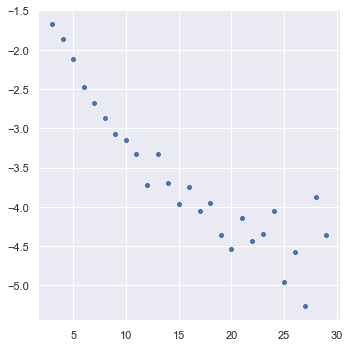

In [16]:
try:
    sns.relplot(x=df["k"],y=df["Mean of the minimum roots"],data=df)
except:
    pass

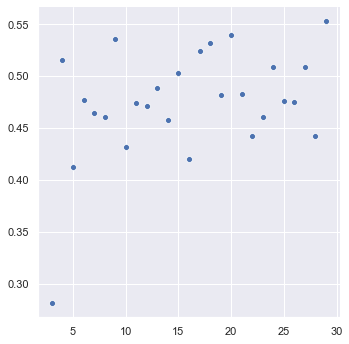

In [17]:
try:
    sns.relplot(x=df["k"],y=df["Std dev of the maximum roots"],data=df)
except:
    pass

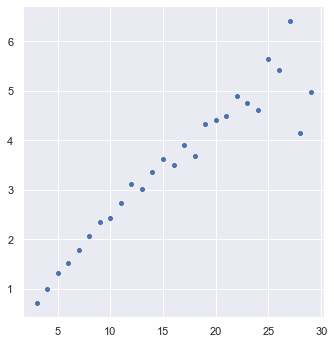

In [18]:
try:
    sns.relplot(x=df["k"],y=df["Std dev of the minimum roots"],data=df)
except:
    pass